In [ ]:
# @title Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load the dataset
data = pd.read_csv("/content/car data.csv")

In [ ]:
# @title Data Exploration
# Data Exploration
print(data.head())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


In [ ]:
print(data.describe())

              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


In [ ]:
data = data.drop(columns=["Car_Name"])

In [ ]:
# @title Data Preprocessing
# Encoding categorical variables
label_encoder = LabelEncoder()
data['Fuel_Type'] = label_encoder.fit_transform(data['Fuel_Type'])
data['Selling_type'] = label_encoder.fit_transform(data['Selling_type'])
data['Transmission'] = label_encoder.fit_transform(data['Transmission'])

In [ ]:
# Split data into features (X) and target variable (y)
X = data.drop(columns=["Selling_Price"])
y = data["Selling_Price"]

In [ ]:
# @title Split data into training and testing sets
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# @title Feature Scaling
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# @title Model Training
# Model Training
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [ ]:
# @title Model Evaluation
# Model Evaluation
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

In [ ]:
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

In [ ]:
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R-squared:", r2_train)
print("Test R-squared:", r2_test)

Train RMSE: 1.7537910792060416
Test RMSE: 1.8792498207978254
Train R-squared: 0.8836563703329277
Test R-squared: 0.8466902419663818


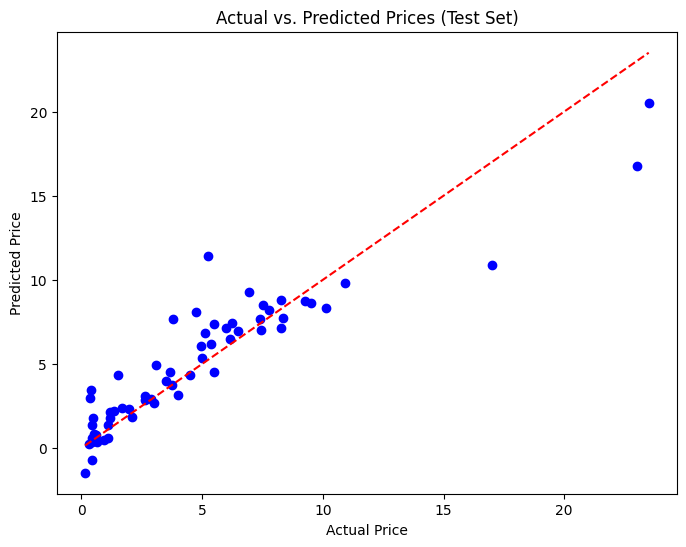

In [ ]:
# Plotting actual vs. predicted prices for the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices (Test Set)')
plt.show()

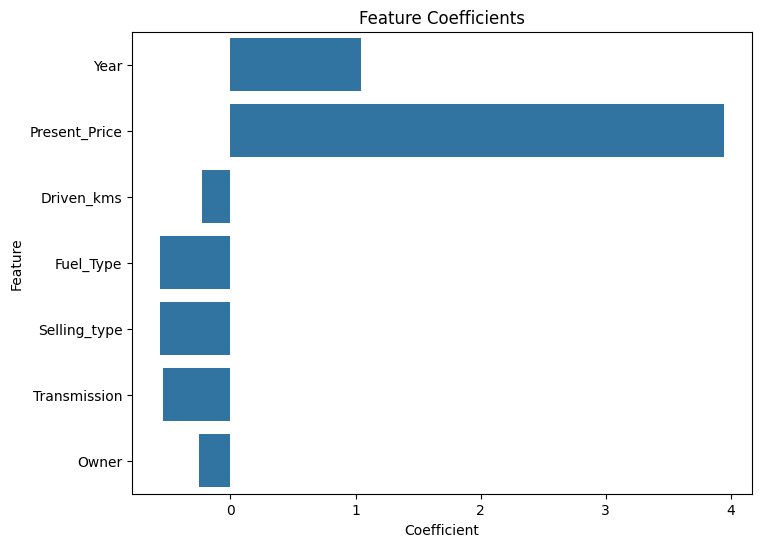

In [ ]:
# Plotting coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Coefficients')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()